# RfSolar - Global Energy Data Analysis

Understanding energy started with a macro global look into the energy markets. This notebook explores WorldBank data to help understand the level of access of energy around the world as well as energy production and the types of fuels used around the world.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
import glob as glob
file_names = glob.glob('../../data/worldbank/*')
file_names

['../../data/worldbank/access_electricity_rural_pct.xls',
 '../../data/worldbank/electricity_production_oil_gas_coal_pct.xls',
 '../../data/worldbank/access_electricity_urban_pct.xls',
 '../../data/worldbank/combustible_renewables_waste_pct.xls',
 '../../data/worldbank/electricity_consumption_per_capita.xls',
 '../../data/worldbank/energy_use_per_capita.xls',
 '../../data/worldbank/electricity_production_coal_pct.xls',
 '../../data/worldbank/access_clean_fuel_cooking_pct.xls',
 '../../data/worldbank/world_inequality.xlsx',
 '../../data/worldbank/electricity_production_oil_pct.xls',
 '../../data/worldbank/electricity_production_renewable_no_hydo_kwh.xls',
 '../../data/worldbank/energy_use_per_gdp.xls',
 '../../data/worldbank/energy_consumption_renewables_pct.xls',
 '../../data/worldbank/electric_transmission_distribution_loss_pct.xls',
 '../../data/worldbank/electricity_production_nuclear_pct.xls',
 '../../data/worldbank/population_by_country_2020.csv',
 '../../data/worldbank/electricit

# Import Data

### Source: WorldBank

In [3]:
def clean_xls(path):
    file_ = pd.ExcelFile(path)
    data = file_.parse('Data')
    
    info_cols = [str(x).lower().replace(' ','_') for x in list(data.iloc[2])[:4]] # Clean Info Column Names
    year_cols = [str(x).lower().split(' ')[0] for x in list(data.iloc[2])[4:]] # Clean Year Columns
    new_cols = info_cols + year_cols # Combine for full columns list
    
    data.columns = new_cols
    data = data.iloc[3:].reset_index(drop=1)

    return data

In [4]:
data1 = clean_xls('../../data/worldbank/access_electricity_rural_pct.xls')
data1.head(2)

,country_name,country_code,indicator_name,indicator_code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
0,Aruba,ABW,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.0000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,NaN
1,Afghanistan,AFG,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,30.2188,29.572881,60.849157,61.282199,86.500512,64.573354,97.09936,97.091973,98.272872,NaN


In [5]:
noncountry = list(data1['country_name'].tail(47))

countries = list(data1['country_name'].head(-47))

income_categories = ['Low income','Low & middle income','Lower middle income',\
                     'Middle income','Upper middle income','High income']

dividend_categories = ['Early-demographic dividend','Late-demographic dividend',\
                       'Pre-demographic dividend','Post-demographic dividend']

continents = ['Arab World', 'Caribbean small states', 'Central Europe and the Baltics',\
               'East Asia & Pacific', 'Euro area','Europe & Central Asia', 'Latin America & Caribbean',\
               'Middle East & North Africa','North America', 'Pacific island small states', 'South Asia',\
               'Sub-Saharan Africa','World']

misc_categories = [x for x in noncountry if x not in income_categories + dividend_categories + continents]

# By Continents

# Access to Electricity

In [7]:
# Access to electricity (% of population)
access_electricity_total_pct = clean_xls('../../data/worldbank/access_electricity_total_pct.xls')

# Access to electricity, urban (% of urban population)
access_electricity_urban_pct = clean_xls('../../data/worldbank/access_electricity_urban_pct.xls')

# Access to electricity, rural (% of rural population)
access_electricity_rural_pct = clean_xls('../../data/worldbank/access_electricity_rural_pct.xls')

# Access to clean fuels and technologies for cooking (% of population)'
access_clean_fuel_cooking_pct = clean_xls('../../data/worldbank/access_clean_fuel_cooking_pct.xls')

In [24]:
def plot_continents(data):
    # Get Continent Data
    continent_data = data[data['country_name'].isin(continents)]
    
    # Wrangle for plot
    continent_plot_data = continent_data.set_index('country_name').drop(['country_code','indicator_name','indicator_code'],1).dropna(how='all', axis=1).T
    
    print(data['indicator_name'][0])
    # Plot
    _ = plt.figure(figsize=(10,6))
    _ = plt.plot(continent_plot_data)
    _ = plt.xlabel('Year')
    _ = plt.ylabel('Production (%)')
    _ = plt.xticks(continent_plot_data.index[::10])
    _ = plt.legend(continent_plot_data.columns, bbox_to_anchor=(0.5,0,1,1))

## Sub-Saharan Africa remains the lowest access with still under 50% of their population without access. Much of the other previously struggling continents such as South Asia and Pacific islands have reached above 80% penetration.

#### Access to Electricity (% of Population)

Access to electricity (% of population)


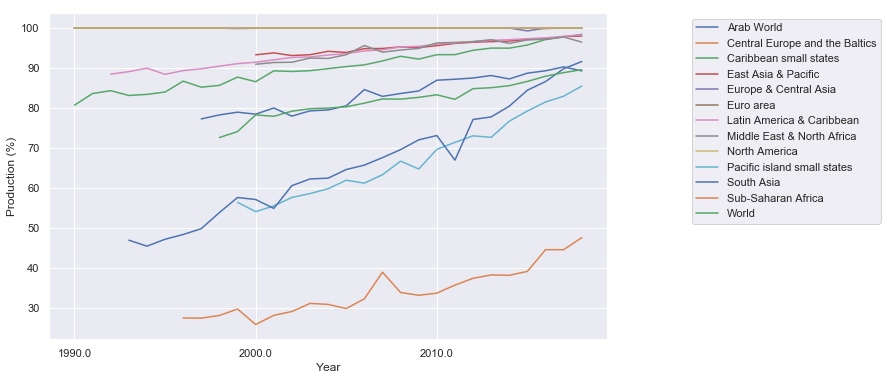

In [25]:
plot_continents(access_electricity_total_pct)

## Access to Electricity - Urban (% of Urban Population)

Access to electricity, urban (% of urban population)


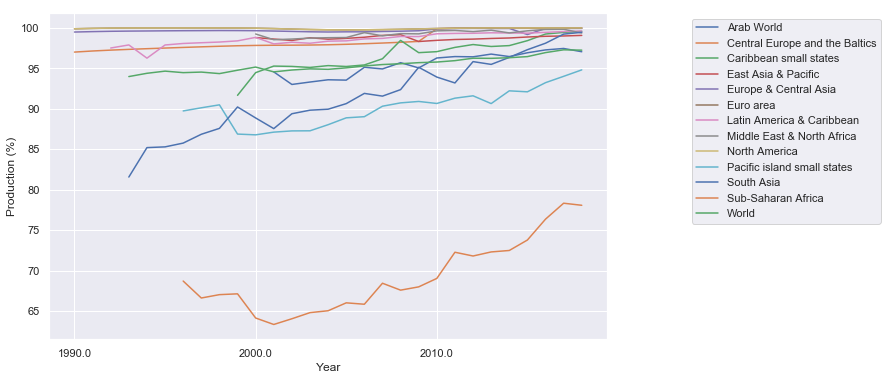

In [26]:
plot_continents(access_electricity_urban_pct)

## Access to Electricity - Rural (% of Rural Population)

Access to electricity, rural (% of rural population)


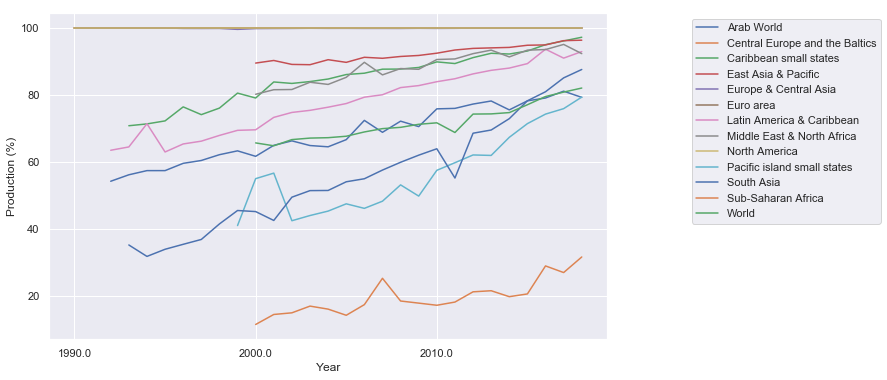

In [27]:
plot_continents(access_electricity_rural_pct)

## Much of the world still lacks access to clean fuels and technologies for cooking. Alternatives consist mainly of kerosine and wood which can have significant impacts on health.

#### Access to Clean Fuels and Technologies for Cooking (% of Population)

Access to clean fuels and technologies for cooking (% of population)


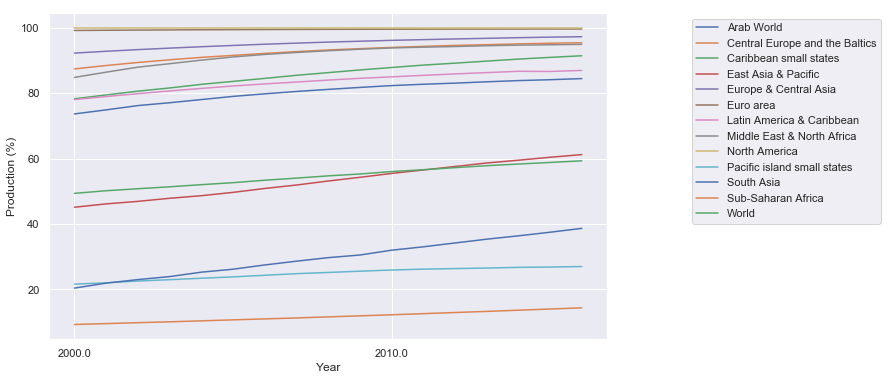

In [28]:
plot_continents(access_clean_fuel_cooking_pct)

# Electricity Production

In [31]:
# Electricity production from coal sources (% of total)
electric_production_coal_pct = clean_xls('../../data/worldbank/electricity_production_coal_pct.xls')

# Electricity production from oil sources
electric_production_oil_pct = clean_xls('../../data/worldbank/electricity_production_oil_pct.xls')

# Electricity production from nuclear sources (% of total)
electric_production_nuclear_pct = clean_xls('../../data/worldbank/electricity_production_nuclear_pct.xls')

# Electricity production from oil, gas and coal sources (% of total)
electric_production_oil_gas_coal_pct = clean_xls('../../data/worldbank/electricity_production_oil_gas_coal_pct.xls')

# Electricity production from renewable sources, excluding hydroelectric (% of total)
electric_production_renewable_no_hydro_pct = clean_xls('../../data/worldbank/electricity_production_renewable_no_hydro_pct.xls')

# Electricity production from renewable sources, exlcuding hydroelectric (kWh)
electric_production_renewable_no_hydo_kwh = clean_xls('../../data/worldbank/electricity_production_renewable_no_hydo_kwh.xls')

# Alternative and nuclear energy (% of total energy use)
alternative_and_nuclear_energy_pct = clean_xls('../../data/worldbank/alternative_and_nuclear_energy_pct.xls')

# Combustible renewables and waste (% of total energy)
combustible_renewables_waste_pct = clean_xls('../../data/worldbank/combustible_renewables_waste_pct.xls')

# Trends

## East Asia & Pacific has seen a major shift to coal production for electricity since the mid 1970s now producing about 60% of their electricity from the source.

### Electicity Production - Coal Sources (% of Total)


Electricity production from coal sources (% of total)


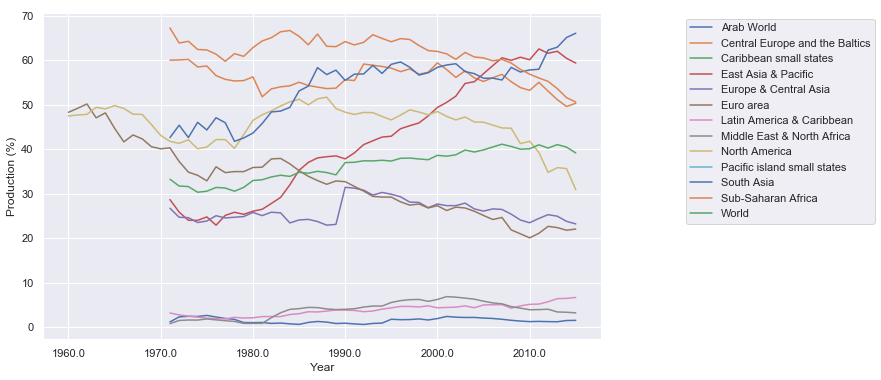

In [32]:
plot_continents(electric_production_coal_pct)

## Global use of Oil as a source of electricity production has gone down with Arab World and Middle East/North Africa with top Oil product by percent at about 20%.

### Electricity Production - Oil Sources (% of Total)

Electricity production from oil sources (% of total)


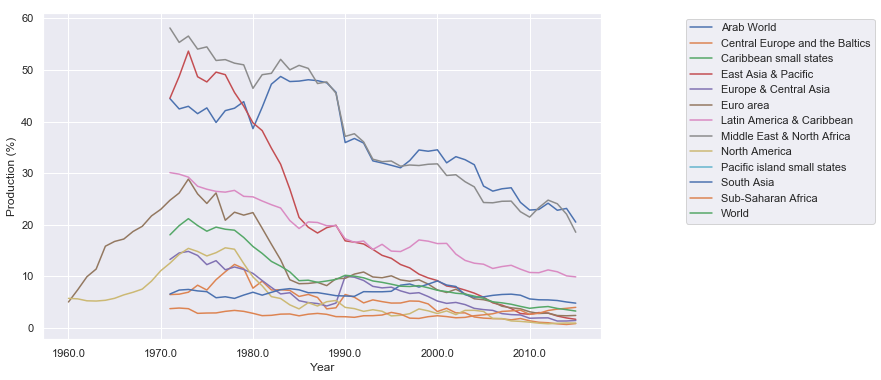

In [33]:
plot_continents(electric_production_oil_pct)

## Adoption of Nuclear has plateaud after an initial push in the 1980s with global peak in the 1990s and Europe now being the highest percentage producer at about 30%.

### Electricity Production - Nuclear Sources (% of Total)

Electricity production from nuclear sources (% of total)


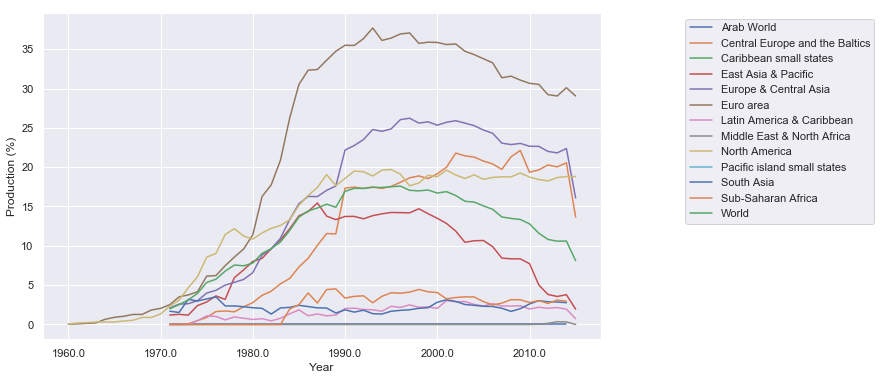

In [34]:
plot_continents(electric_production_nuclear_pct)

## Middle East & North Africa are the highest by percent fossil fuel consumers by percent with the majority of their energy (~90%) being produced by some form of fossil fuel.

#### Electricity Production - Oil, Gas and Coal Sources (% of Total)

Electricity production from oil, gas and coal sources (% of total)


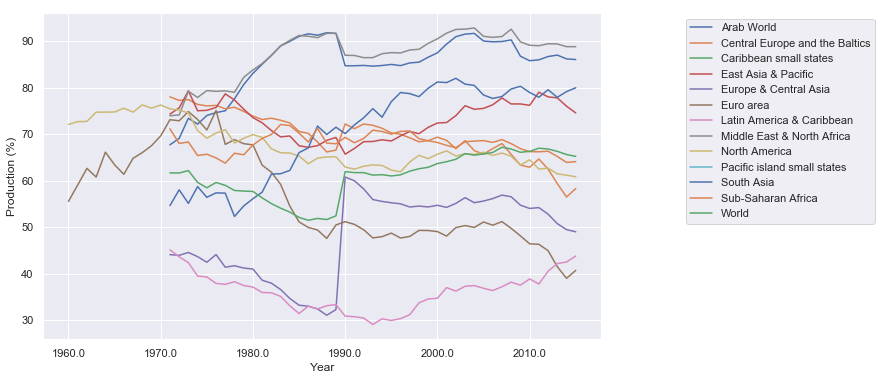

In [35]:
plot_continents(electric_production_oil_gas_coal_pct)

## Renewable energy has been growing exponentially with Europe taking the lead at over 18% of penetration. 

#### Electricity Production - Renewable Sources, Excluding Hydroelectric (% of Total)

Electricity production from renewable sources, excluding hydroelectric (% of total)


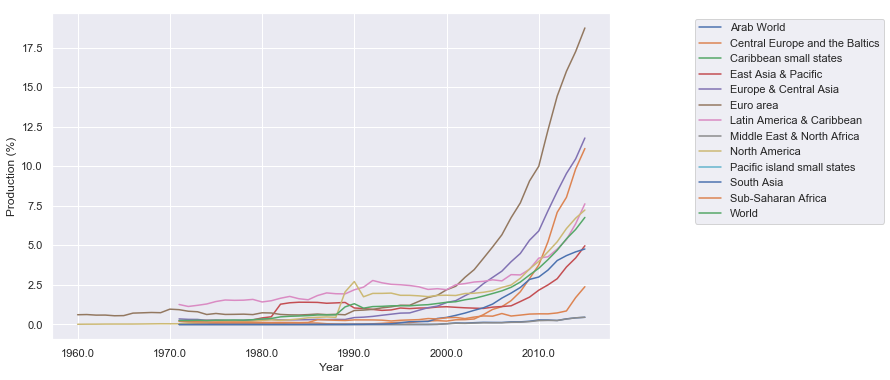

In [37]:
plot_continents(electric_production_renewable_no_hydro_pct)

#### Electricity Production - Renewable Sources, excluding Hydroelectric (kWh)

Electricity production from renewable sources, excluding hydroelectric (kWh)


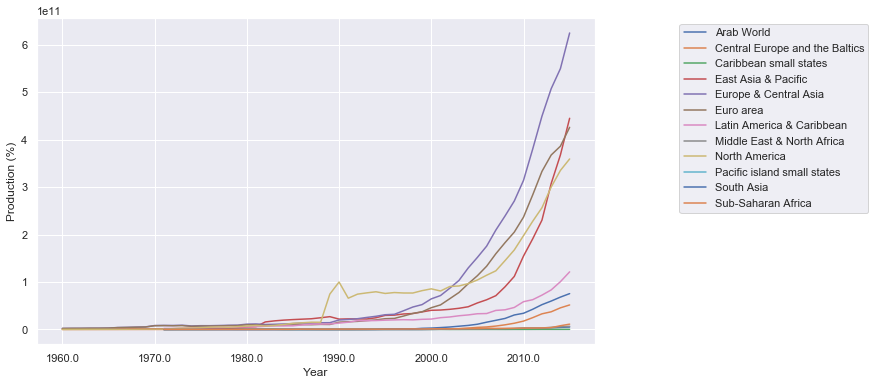

In [57]:
plot_continents(electric_production_renewable_no_hydo_kwh[electric_production_renewable_no_hydo_kwh['country_name'] != 'World'])

## Alternative and Nuclear Energy (% of Total Energy Use)

Alternative and nuclear energy (% of total energy use)


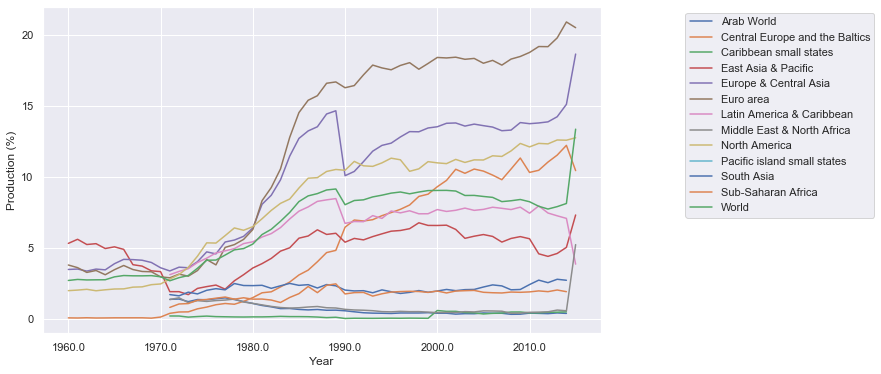

In [232]:
plot_continents(alternative_and_nuclear_energy_pct)

## Sub-Saharan Africa has the highest percent production of energy from combustible renewables and waste at just below 50%. South Asia is second at around 22% but has made significant improvements in the past 40 years.

#### Combustible Renewables and Waste (% of Total Energy)

Combustible renewables and waste (% of total energy)


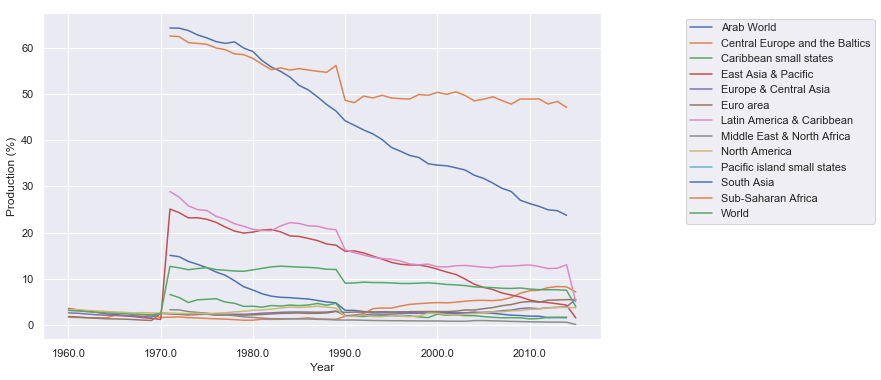

In [58]:
plot_continents(combustible_renewables_waste_pct)

# Consumption

In [39]:
# Electirc power consumption (kWh per capita)
electric_consumption_per_capita = clean_xls('../../data/worldbank/electricity_consumption_per_capita.xls')

# Fossil fuel energy consumption (% of total)
energy_consumption_fossil_fuel_pct = clean_xls('../../data/worldbank/energy_consumption_fossil_fuel_pct.xls')

# Renewable energy consumption (% of total final energy consumption)
energy_consumption_renewables_pct = clean_xls('../../data/worldbank/energy_consumption_renewables_pct.xls')

# Energy use (kg of oil equivalent per capita)
energy_use_per_capita = clean_xls('../../data/worldbank/energy_use_per_capita.xls')

# Energy use (kg of oil equivalent) per $1,000 GDP (constant 2017 PPP)
energy_use_per_gdp = clean_xls('../../data/worldbank/energy_use_per_gdp.xls')

## North America dwarfs all other continents when it comes to electricity consumption per capita

#### Electric Power Consumption (kWh per Capita)

Electric power consumption (kWh per capita)


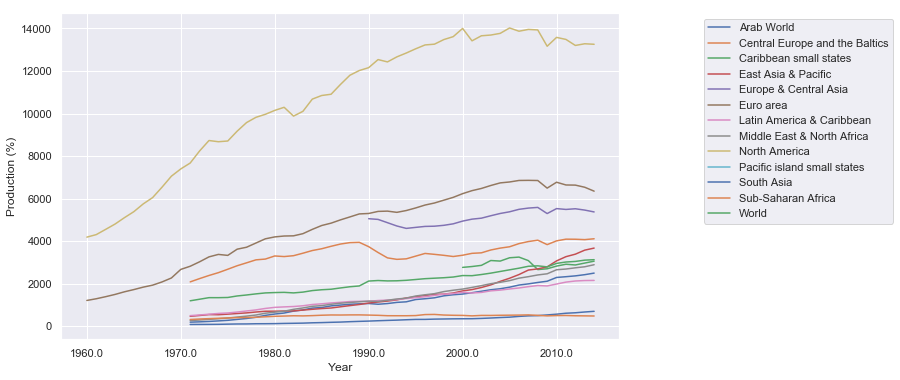

In [30]:
plot_continents(electric_consumption_per_capita)

## Fossil Fuel Energy Consumption (% of Total)

Fossil fuel energy consumption (% of total)


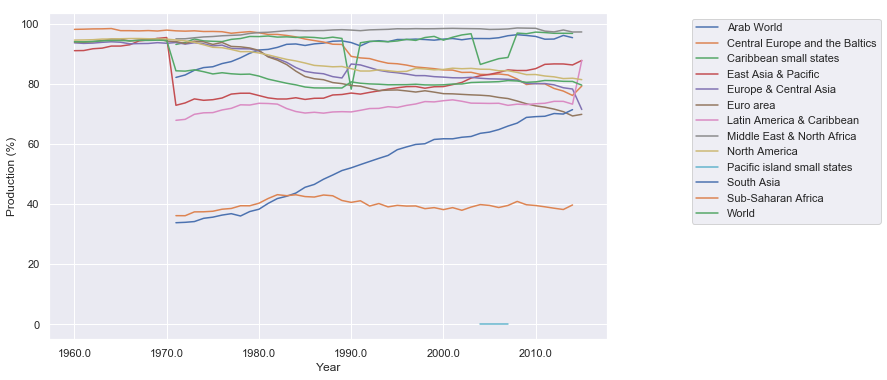

In [40]:
plot_continents(energy_consumption_fossil_fuel_pct)

## Renewable Energy Consumption (% of Total Final Energy Consumption)

Renewable energy consumption (% of total final energy consumption)


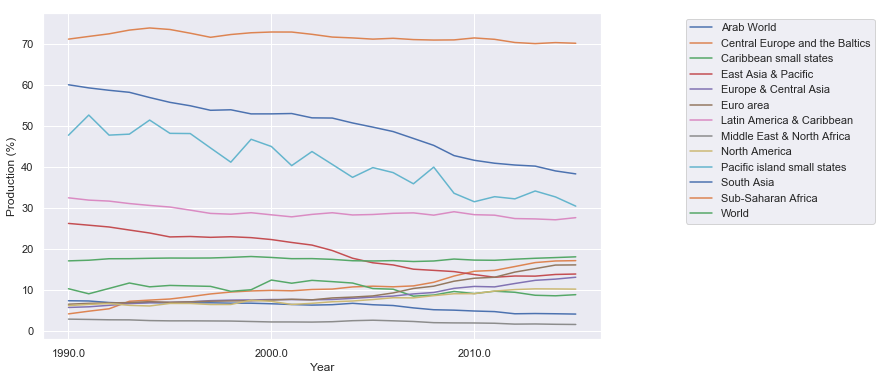

In [41]:
plot_continents(energy_consumption_renewables_pct)

## Energy Use (kg of Oil Equivalent per Capita)

Energy use (kg of oil equivalent per capita)


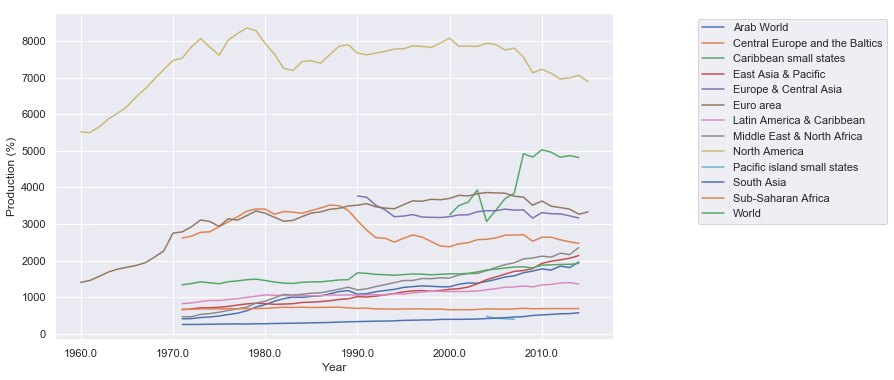

In [42]:
plot_continents(energy_use_per_capita)

## Energy Use (kg of Oil Equivalent) per $1,000 GDP (constant 2017 PPP)

Energy use (kg of oil equivalent) per $1,000 GDP (constant 2017 PPP)


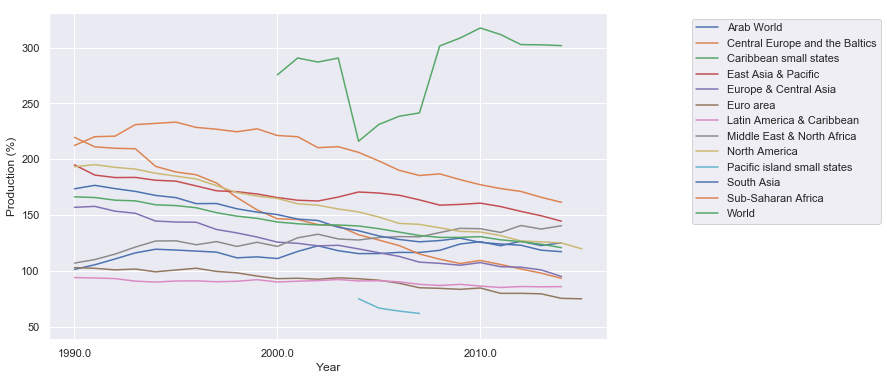

In [43]:
plot_continents(energy_use_per_gdp)

# Electricity Losses

In [47]:
# Electric power transmission and distribution losses (% of output)
electric_transmission_distribution_loss_pct = clean_xls('../../data/worldbank/electric_transmission_distribution_loss_pct.xls')

## Electric Power Transmission and Distribution Losses (% of Output)

Electric power transmission and distribution losses (% of output)


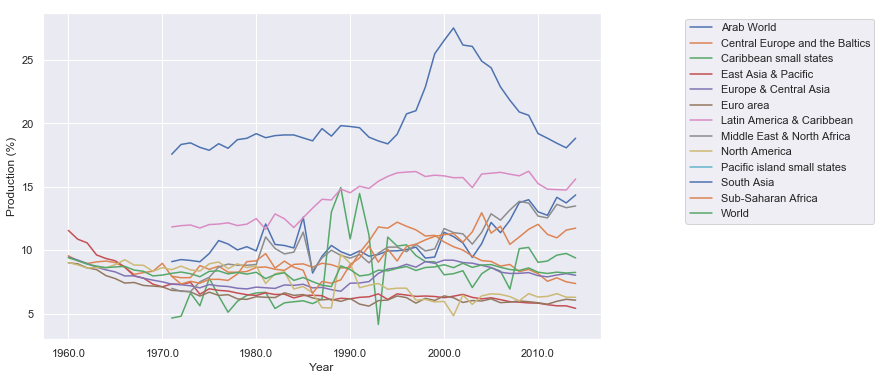

In [48]:
plot_continents(electric_transmission_distribution_loss_pct)

In [245]:
# 
loss_data = electric_transmission_distribution_loss_pct[electric_transmission_distribution_loss_pct['country_name'].isin(continents)]
    
# Wrangle for plot
loss_data_cleaned = loss_data.set_index('country_name').drop(['country_code','indicator_name','indicator_code'],1)

In [254]:
loss_data.sort_values('2014.0')[['country_name','country_code',\
                                '1980.0','1985.0','1990.0','1995.0','2000.0','2005.0','2010.0','2014.0']]

,country_name,country_code,1980.0,1985.0,1990.0,1995.0,2000.0,2005.0,2010.0,2014.0
61,East Asia & Pacific,EAS,6.431587,6.424237,6.161812,6.556299,6.252611,6.248892,5.823598,5.412341
66,Euro area,EMU,6.330201,6.501306,6.188780,6.391075,6.395944,6.160623,5.855670,6.057205
168,North America,NAC,8.758879,7.134003,8.977126,7.002998,5.967746,6.559870,6.306418,6.286489
34,Central Europe and the Baltics,CEB,8.641454,8.920876,8.632132,12.211809,10.652216,9.115908,8.152577,7.370623
63,Europe & Central Asia,ECS,7.088614,7.314293,7.399406,8.624070,9.214642,8.636183,7.991513,8.021752
257,World,WLD,8.260819,7.849154,8.475500,8.567923,8.853739,8.864808,8.264140,8.250599
47,Caribbean small states,CSS,6.628941,6.009873,10.886495,10.329519,8.060739,8.626078,9.043981,9.389468
215,Sub-Saharan Africa,SSF,9.163763,8.417933,8.873204,9.148246,11.221830,11.348420,12.043805,11.740747
151,Middle East & North Africa,MEA,8.870195,11.430197,9.376640,10.249241,11.712743,12.874301,12.691678,13.490631
5,Arab World,ARB,9.943808,12.611399,9.595228,9.953061,11.416443,12.194060,13.029799,14.359833


# All Countries - 2014 Combined Data

In [301]:
key_columns = ['country_name','indicator_code','2014.0']

In [329]:
data = access_clean_fuel_cooking_pct[key_columns].set_index(['country_name','indicator_code']).unstack()
data = pd.merge(data, access_electricity_total_pct[key_columns].set_index(['country_name','indicator_code']).unstack(), left_index=True, right_index=True)
data = pd.merge(data, access_electricity_rural_pct[key_columns].set_index(['country_name','indicator_code']).unstack(), left_index=True, right_index=True)
data = pd.merge(data, access_electricity_urban_pct[key_columns].set_index(['country_name','indicator_code']).unstack(), left_index=True, right_index=True)
data = pd.merge(data, alternative_and_nuclear_energy_pct[key_columns].set_index(['country_name','indicator_code']).unstack(), left_index=True, right_index=True)
data = pd.merge(data, combustible_renewables_waste_pct[key_columns].set_index(['country_name','indicator_code']).unstack(), left_index=True, right_index=True)
data = pd.merge(data, electric_consumption_per_capita[key_columns].set_index(['country_name','indicator_code']).unstack(), left_index=True, right_index=True)
data = pd.merge(data, electric_production_coal_pct[key_columns].set_index(['country_name','indicator_code']).unstack(), left_index=True, right_index=True)
data = pd.merge(data, electric_production_nuclear_pct[key_columns].set_index(['country_name','indicator_code']).unstack(), left_index=True, right_index=True)
data = pd.merge(data, electric_production_oil_gas_coal_pct[key_columns].set_index(['country_name','indicator_code']).unstack(), left_index=True, right_index=True)
data = pd.merge(data, electric_production_oil_pct[key_columns].set_index(['country_name','indicator_code']).unstack(), left_index=True, right_index=True)
data = pd.merge(data, electric_production_renewable_no_hydo_kwh[key_columns].set_index(['country_name','indicator_code']).unstack(), left_index=True, right_index=True)
data = pd.merge(data, electric_production_renewable_no_hydro_pct[key_columns].set_index(['country_name','indicator_code']).unstack(), left_index=True, right_index=True)
data = pd.merge(data, electric_transmission_distribution_loss_pct[key_columns].set_index(['country_name','indicator_code']).unstack(), left_index=True, right_index=True)
data = pd.merge(data, energy_consumption_fossil_fuel_pct[key_columns].set_index(['country_name','indicator_code']).unstack(), left_index=True, right_index=True)
data = pd.merge(data, energy_consumption_renewables_pct[key_columns].set_index(['country_name','indicator_code']).unstack(), left_index=True, right_index=True)
data = pd.merge(data, energy_use_per_capita[key_columns].set_index(['country_name','indicator_code']).unstack(), left_index=True, right_index=True)
data = pd.merge(data, energy_use_per_gdp[key_columns].set_index(['country_name','indicator_code']).unstack(), left_index=True, right_index=True)

In [340]:
data.head()

2014.0                                   \
indicator_code EG.CFT.ACCS.ZS EG.ELC.ACCS.ZS EG.ELC.ACCS.RU.ZS   
country_name                                                     
Afghanistan             27.99       89.50000         86.500512   
Albania                 73.98      100.00000        100.000000   
Algeria                 93.10       99.84082         99.479064   
American Samoa            NaN            NaN               NaN   
Andorra                100.00      100.00000        100.000000   

                                                                   \
indicator_code EG.ELC.ACCS.UR.ZS EG.USE.COMM.CL.ZS EG.USE.CRNW.ZS   
country_name                                                        
Afghanistan            98.700000               NaN            NaN   
Albania               100.000000         24.548050       9.361381   
Algeria                99.994232          0.030106       0.011600   
American Samoa               NaN               NaN            NaN   
Andorra               100.000000               NaN            NaN   

                                                                               \
indicator_code EG.USE.ELEC.KH.PC EG.ELC.COAL.ZS EG.ELC.NUCL.ZS EG.ELC.FOSL.ZS   
country_name                                                                    
Afghanistan                  NaN            NaN            NaN            NaN   
Albania              2309.366503            0.0            0.0        0.00000   
Algeria              1362.871919            0.0            0.0       99.60462   
American Samoa               NaN            NaN            NaN            NaN   
Andorra                      NaN            NaN            NaN            NaN   

                                                                            \
indicator_code EG.ELC.PETR.ZS EG.ELC.RNWX.KH EG.ELC.RNWX.ZS EG.ELC.LOSS.ZS   
country_name                                                                 
Afghanistan               NaN            NaN            NaN            NaN   
Albania               0.00000            0.0            0.0      23.687553   
Algeria               0.99312            0.0            0.0      17.127424   
American Samoa            NaN            NaN            NaN            NaN   
Andorra                   NaN            NaN            NaN            NaN   

                                                                   \
indicator_code EG.USE.COMM.FO.ZS EG.FEC.RNEW.ZS EG.USE.PCAP.KG.OE   
country_name                                                        
Afghanistan                  NaN      19.314269               NaN   
Albania                61.421801      38.689501        808.455840   
Algeria                99.977917       0.068640       1327.535544   
American Samoa               NaN       0.700882               NaN   
Andorra                      NaN      19.886323               NaN   

                                     
indicator_code EG.USE.COMM.GD.PP.KD  
country_name                         
Afghanistan                     NaN  
Albania                   68.349676  
Algeria                  117.175859  
American Samoa                  NaN  
Andorra                         NaN